In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = r"C:\Users\gonza\Downloads\hotel_booking_demand\hotel_bookings.csv"
df_hotel = pd.read_csv(url)
df_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [3]:
# vemos un poco el dataframe en general
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [4]:
# nan values percentage
(df_hotel.isnull().sum().sort_values(ascending=False).head(5) / len(df_hotel)) * 100

company      94.306893
agent        13.686238
country       0.408744
children      0.003350
lead_time     0.000000
dtype: float64

In [5]:
# replace nan values
nan_replaces = {"children": 0.0, "country":"unknown","agent":0, "company":0}
df_hotel_clean = df_hotel.fillna(nan_replaces)

In [6]:
#Where do the guests come from? (cancelled are included)
df_hotel["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [7]:
countrys_city = df_hotel_clean[df_hotel_clean["hotel"] == "City Hotel"]["country"].value_counts(ascending=False, normalize=True).head(10) * 100

country_resorts = df_hotel_clean[df_hotel_clean ["hotel"] == "Resort Hotel"]["country"].value_counts(ascending=False, normalize=True).head(10) * 100


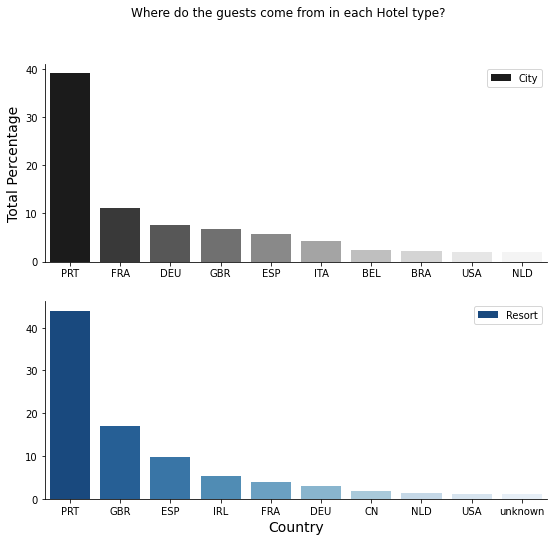

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,8))
sns.barplot(y="country", x="index", palette="Greys_r",ax=ax1, label="City", data=countrys_city.reset_index())
ax1.set_ylabel("Total Percentage",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax1.set_yticks(np.arange(0,50,10))
ax1.set_xlabel("")
ax1.legend()
sns.despine()


sns.barplot(y="country", x="index", palette="Blues_r",ax=ax2, label="Resort", data=country_resorts.reset_index())
ax2.set_xlabel("Country",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax2.set_ylabel("")
ax2.legend()
fig.suptitle("Where do the guests come from in each Hotel type?",fontdict={'fontsize': 17, 'fontweight': 'medium'})
sns.despine()


In [9]:
# clean rows where adults == 0; we have to drop them
zero_adults = list(df_hotel_clean[df_hotel_clean["adults"] == 0].index)
df_hotel_clean.drop(df_hotel_clean.index[zero_adults], inplace=True)

In [10]:
# home country of guest (total adults guest)
df_hotel_clean.groupby("country")["adults"].sum().sort_values(ascending=False).head(10)

country
PRT    86131
GBR    23223
FRA    20291
ESP    16615
DEU    13703
ITA     7384
IRL     6570
BEL     4588
BRA     4450
USA     3950
Name: adults, dtype: int64

In [11]:
# How much do guests pay for a room per night? EUROS
# we first filter by hotel type and only count the non-cancelled reservations
city_active = df_hotel_clean[(df_hotel_clean["is_canceled"] == 0) & (df_hotel_clean["hotel"] == "City Hotel") ]
resort_active = df_hotel_clean[(df_hotel_clean["is_canceled"] == 0) & (df_hotel_clean["hotel"] == "Resort Hotel") ]

# now we divided reservation price and total guest (children included)
price_person_city = city_active["adr"] / (city_active["adults"] + city_active["children"])
price_person_resort = resort_active["adr"] / (resort_active["adults"] + resort_active["children"])

print(" the average price per person and hotel are:")
print("____________________________________\n")
print (f"city_hotel: {round(price_person_city.mean(),2)} EUROS" )   
print (f"resort_hotel: {round(price_person_resort.mean(),2)} EUROS")    

the average price per person and hotel are:
____________________________________

city_hotel: 59.33 EUROS
resort_hotel: 47.49 EUROS


In [12]:
# price per room type at resort hotel
room_types = df_hotel_clean.reserved_room_type.unique()
for i in room_types:
    df = resort_active[resort_active["reserved_room_type"] == i]
    print(f"Price describe room type: {i}")
    print("_____________________________")
    display(df["adr"].describe())

Price describe room type: C
_____________________________


count    615.000000
mean     154.263187
std       73.372132
min        0.000000
25%       94.855000
50%      158.670000
75%      210.000000
max      367.000000
Name: adr, dtype: float64

Price describe room type: A
_____________________________


count    17007.000000
mean        73.846920
std         47.994859
min         -6.380000
25%         42.375000
50%         59.000000
75%         90.000000
max        508.000000
Name: adr, dtype: float64

Price describe room type: D
_____________________________


count    5477.000000
mean      100.079270
std        57.064634
min         0.000000
25%        60.000000
50%        80.000000
75%       129.000000
max       350.750000
Name: adr, dtype: float64

Price describe room type: E
_____________________________


count    3573.000000
mean      108.993305
std        56.868204
min         0.000000
25%        68.400000
50%        93.670000
75%       138.000000
max       349.670000
Name: adr, dtype: float64

Price describe room type: G
_____________________________


count    966.00000
mean     159.76765
std       75.20609
min        0.00000
25%      101.77500
50%      146.60500
75%      203.32750
max      426.25000
Name: adr, dtype: float64

Price describe room type: F
_____________________________


count    926.000000
mean     128.754050
std       69.102716
min        0.000000
25%       78.250000
50%      111.465000
75%      172.075000
max      368.100000
Name: adr, dtype: float64

Price describe room type: H
_____________________________


count    356.000000
mean     180.870112
std       77.703077
min        0.000000
25%      116.075000
50%      174.000000
75%      230.000000
max      402.000000
Name: adr, dtype: float64

Price describe room type: L
_____________________________


count      4.000000
mean     151.000000
std       50.345473
min       82.000000
25%      133.000000
50%      161.000000
75%      179.000000
max      200.000000
Name: adr, dtype: float64

Price describe room type: B
_____________________________


count      3.000000
mean     104.666667
std       32.331615
min       70.000000
25%       90.000000
50%      110.000000
75%      122.000000
max      134.000000
Name: adr, dtype: float64

Month price average at resort hotel; first groupby by month and mean; denn we have to reindex in the correct month 

In [13]:
month_price_resort_hotel = resort_active.groupby("arrival_date_month")["adr"].mean()
month_price = month_price_resort_hotel.reindex(resort_active["arrival_date_month"].unique(),copy=True)

In [14]:
month_price


arrival_date_month
July         150.122528
August       181.205892
September     96.416860
October       61.775449
November      48.706289
December      68.410104
January       48.761125
February      54.147478
March         57.056838
April         75.867816
May           76.657558
June         107.974850
Name: adr, dtype: float64

In [15]:
month = month_price.to_frame().reset_index()

In [16]:
month

,arrival_date_month,adr
0,July,150.122528
1,August,181.205892
2,September,96.416860
3,October,61.775449
4,November,48.706289
5,December,68.410104
6,January,48.761125
7,February,54.147478
8,March,57.056838
9,April,75.867816


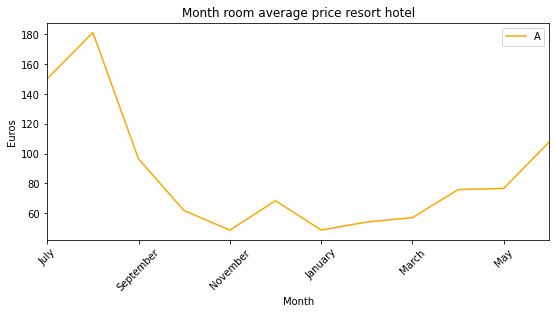

In [28]:
plt.figure(figsize=(9,4))
month_price.plot(color="orange")
plt.xlabel("Month")
plt.ylabel("Euros")
plt.title("Month room average price resort hotel")
plt.xticks(rotation=45)
plt.legend("Average month price")
plt.show()

In [34]:
# total adults and children per month at city hotel
city_person = city_active.groupby("arrival_date_month")[["adults","children"]].sum()


In [35]:
#total adults and children per month at resort hotel
resort_person = resort_active.groupby("arrival_date_month")[["adults","children"]].sum()

In [38]:
# we create new column with total person
city_person["total"] = city_person["adults"] + city_person["children"]
resort_person["total"] = resort_person["adults"] + city_person["children"]

In [40]:
# order months
city_person.reset_index(inplace=True)
city_person

,arrival_date_month,adults,children,total
0,April,7665,439.0,8104.0
1,August,10528,994.0,11522.0
2,December,4393,258.0,4651.0
3,February,5369,301.0,5670.0
4,January,3779,165.0,3944.0
5,July,9388,804.0,10192.0
6,June,8032,325.0,8357.0
7,March,7357,238.0,7595.0
8,May,8297,252.0,8549.0
9,November,4449,95.0,4544.0


In [41]:
city_person["arrival_date_month"] = pd.Categorical(city_person["arrival_date_month"],
                                    categories=meses,ordered=True)

In [51]:
resort_person = resort_person.reindex(resort_active["arrival_date_month"].unique(),copy=True)

In [52]:
resort_person

,adults,children,total
arrival_date_month,,,
July,6311,675.0,7115.0
August,6640,773.0,7634.0
September,4006,137.0,4212.0
October,4619,150.0,4878.0
November,3348,88.0,3443.0
December,3574,176.0,3832.0
January,3062,106.0,3227.0
February,4066,212.0,4367.0
March,4424,162.0,4662.0


In [53]:
resort_person.reset_index(inplace=True)
resort_person["arrival_date_month"] = pd.Categorical(resort_person["arrival_date_month"],
                                    categories=meses)

In [68]:
import plotly.express as px

fig = px.line(resort_person, x="arrival_date_month", y="total",
                title="Total person per month Resort hotel")
fig.update_layout(showlegend=False,
            plot_bgcolor="white",
            xaxis_title= "",
            yaxis_title="Total Persons")

fig.show()

In [77]:
# predicting cancelations (using abs() to get absolute numeric values, and [1:] for not show is_canceled)
df_hotel.corr()[["is_canceled"]].abs().sort_values(by="is_canceled", ascending=False)[1:].style.background_gradient(cmap='viridis')

,is_canceled
lead_time,0.293123
total_of_special_requests,0.234658
required_car_parking_spaces,0.195498
booking_changes,0.144381
previous_cancellations,0.110133
is_repeated_guest,0.0847934
agent,0.0831142
adults,0.0600172
previous_bookings_not_canceled,0.0573577
days_in_waiting_list,0.0541858


In [78]:
#Comparing different base models
# manually choose columns to include
# some columns are excluded to make the model more general and to prevent leakage
# (arrival_date_year, assigned_room_type, booking_changes, reservation_status, country,
# days_in_waiting_list)
# including the country would increase accuracy, but it may also make the model less general

num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

In [80]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#prepocess numerical features (fillna with imputer = 0)
num_transformer = SimpleImputer(strategy="constant")

#prepocesing for categorical features
cat_transformer = Pipeline( steps= [
                ("imputer", SimpleImputer(strategy="constant", fill_value="Unknow")),
                ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [104]:
# Bundle preprocessing for numerical and categorical features:
prepocessor = ColumnTransformer(transformers=[
   ("num",num_transformer, num_features),
   ("cat", cat_transformer, cat_features) 
])

In [83]:
# define model to test:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [102]:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
                ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1)),
                ("LR_model", LogisticRegression(random_state=42, n_jobs=-1))]



In [85]:
# Separate features and predicted value
features = num_features + cat_features 
X = df_hotel.drop(["is_canceled"], axis=1)[features]
y = df_hotel["is_canceled"]

In [105]:
# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', prepocessor),
                              ('model', model)])
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    
    #pipeline.fit(X_train, y_train)
    #preds = pipeline.predict(X_valid)
    #score = accuracy_score(y_valid, preds)
    #print(f"{name} accuracy_score: {round(score, 4)}

DT_model cross validation accuarcy score: 0.8246 +/- 0.0016 (std) min: 0.8221, max: 0.8263
RF_model cross validation accuarcy score: 0.8571 +/- 0.0011 (std) min: 0.8553, max: 0.858
LR_model cross validation accuarcy score: 0.8082 +/- 0.0019 (std) min: 0.8053, max: 0.8107


### ANOTHER WAY KAGGLE 

In [15]:
url = r"C:\Users\gonza\Downloads\hotel_booking_demand\hotel_bookings.csv"
dataset = pd.read_csv(url)
dataset.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [16]:
import datetime
# cheking for missing data
print("Nan in each columns", dataset.isna().sum(),sep='\n')

Nan in each columns
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16

In [17]:
# looking for all unique values in all columns
column = data.columns
for i in column:
    print("\n",i,"\n",dataset[i].unique(),"\n",'-'*80)

'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA' 'PYF' 'GUY' 'LCA'
 'ATA' 'GTM' 'ASM' 'MRT' 'NCL' 'KIR' 'SDN' 'ATF' 'SLE

In [21]:
# making object into categorical variables
dataset['hotel'] = dataset['hotel'].astype('category')
dataset['arrival_date_month'] = dataset['arrival_date_month'].astype('category')
dataset['meal'] = dataset['meal'].astype('category')
dataset['country'] = dataset['country'].astype('category')
dataset['market_segment'] = dataset['market_segment'].astype('category')
dataset['distribution_channel'] = dataset['distribution_channel'].astype('category')
dataset['reserved_room_type'] = dataset['reserved_room_type'].astype('category')
dataset['assigned_room_type'] = dataset['assigned_room_type'].astype('category')
dataset['deposit_type'] = dataset['deposit_type'].astype('category')
dataset['customer_type'] = dataset['customer_type'].astype('category')
dataset['reservation_status'] = dataset['reservation_status'].astype('category')

In [28]:
dataset['arrival_date_month'].dtype

CategoricalDtype(categories=['April', 'August', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September'],
                 ordered=False)

In [29]:
dataset['arrival_date_month'].unique()

[July, August, September, October, November, ..., February, March, April, May, June]
Length: 12
Categories (12, object): [July, August, September, October, ..., March, April, May, June]

In [30]:
# Reordering months so that it starts with 'January' and proceed in the correct order
dataset['arrival_date_month'] = dataset['arrival_date_month'].cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

In [32]:
dataset.groupby('arrival_date_month').size()

arrival_date_month
January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
dtype: int64

In [34]:
dataset['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

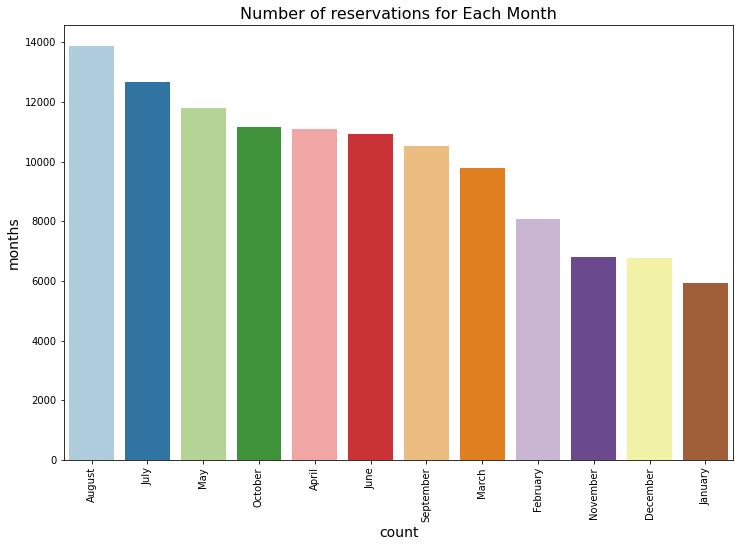

Is it clear that august, july and may are the top 3 months


In [35]:
# Graph examining number of Reservations for each month
plt.figure(figsize=(12,8))
sns.countplot(x="arrival_date_month", data=dataset, palette="Paired",
                order=dataset['arrival_date_month'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of reservations for Each Month", fontsize=16)
plt.xlabel("count", fontsize=14)
plt.ylabel("months", fontsize=14)
plt.show()

print("Is it clear that august, july and may are the top 3 months")